In [151]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore

In [152]:
df = pd.read_csv("vehicle.csv")  

In [153]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [154]:
df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [155]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [157]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [158]:
class_map={'car':0,'bus':1,'van':2}
df['class']=df['class'].map(class_map)

In [159]:
df = df.apply(lambda x: x.fillna(x.median()),axis=0)

In [160]:
df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.728132    0.818044    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          0.0    1.00     2.0

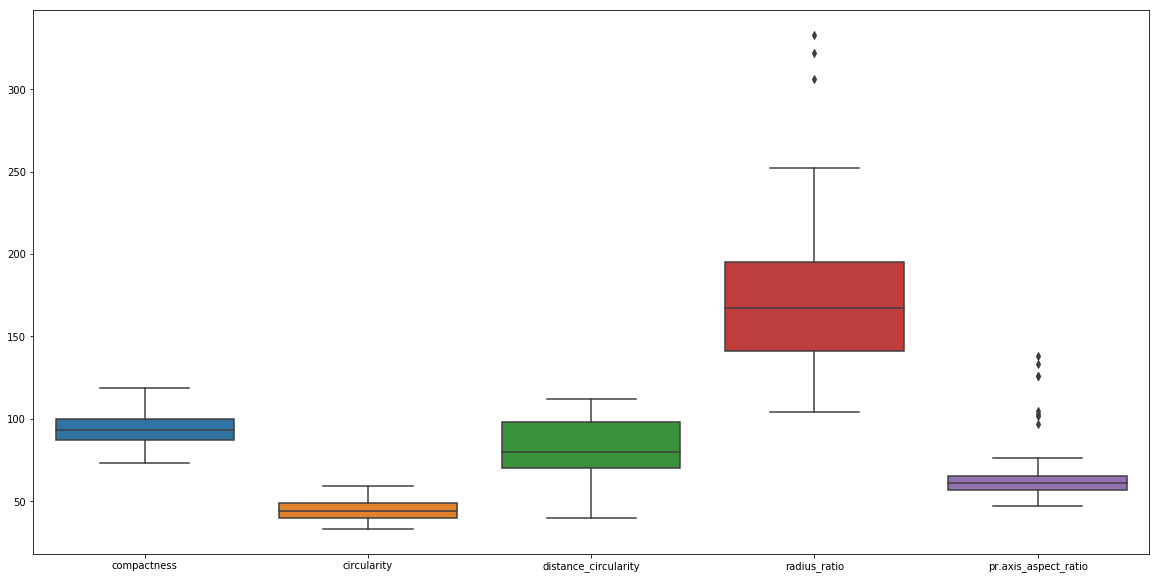

In [201]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df[['compactness','circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio']])

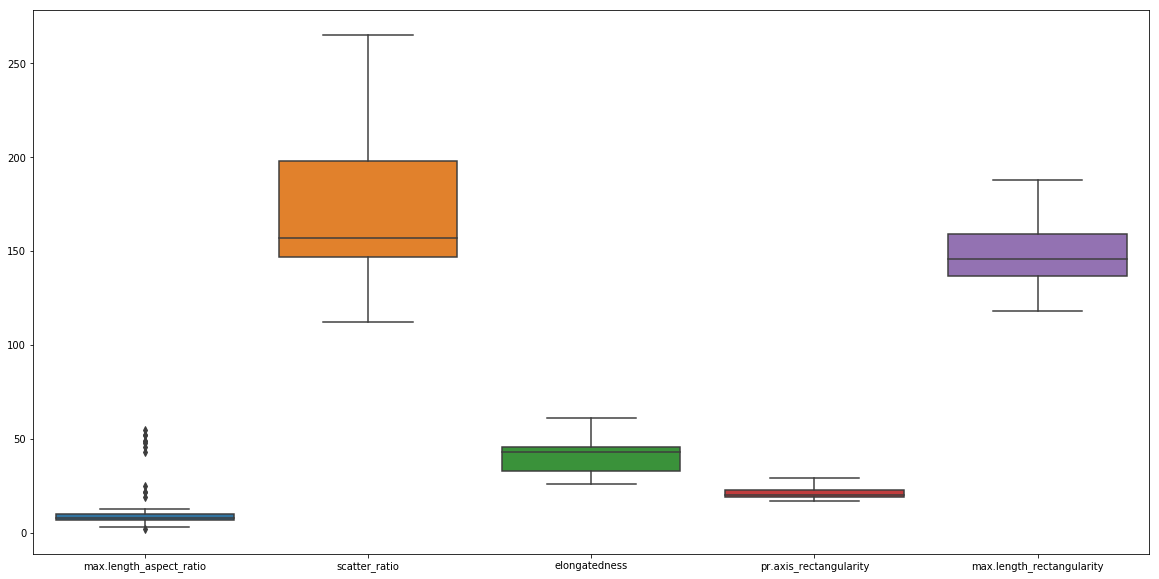

In [205]:
columns=df.columns
plt.figure(figsize=(20,10))
sns.boxplot(data=df[columns[5:10]])

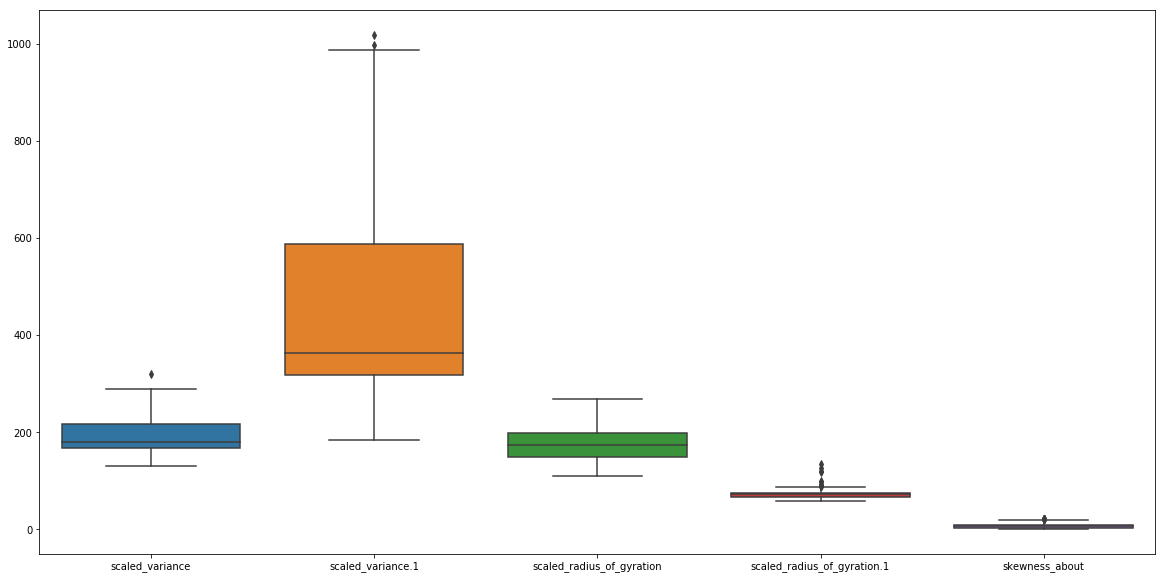

In [209]:
columns=df.columns
plt.figure(figsize=(20,10))
sns.boxplot(data=df[columns[10:15]])

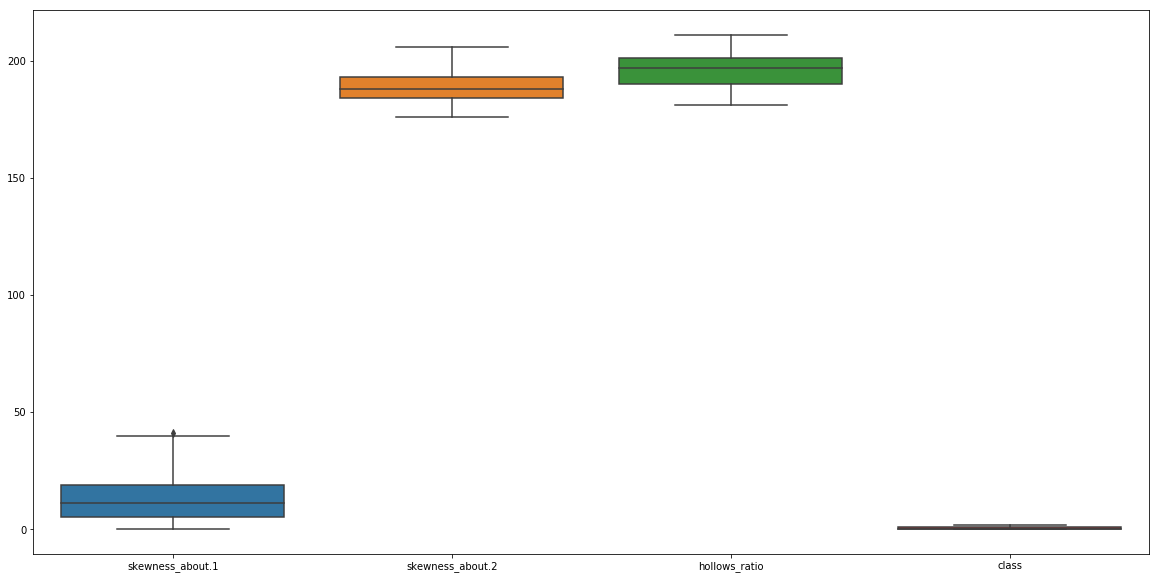

In [219]:
columns=df.columns
plt.figure(figsize=(20,10))
sns.boxplot(data=df[columns[15:]])

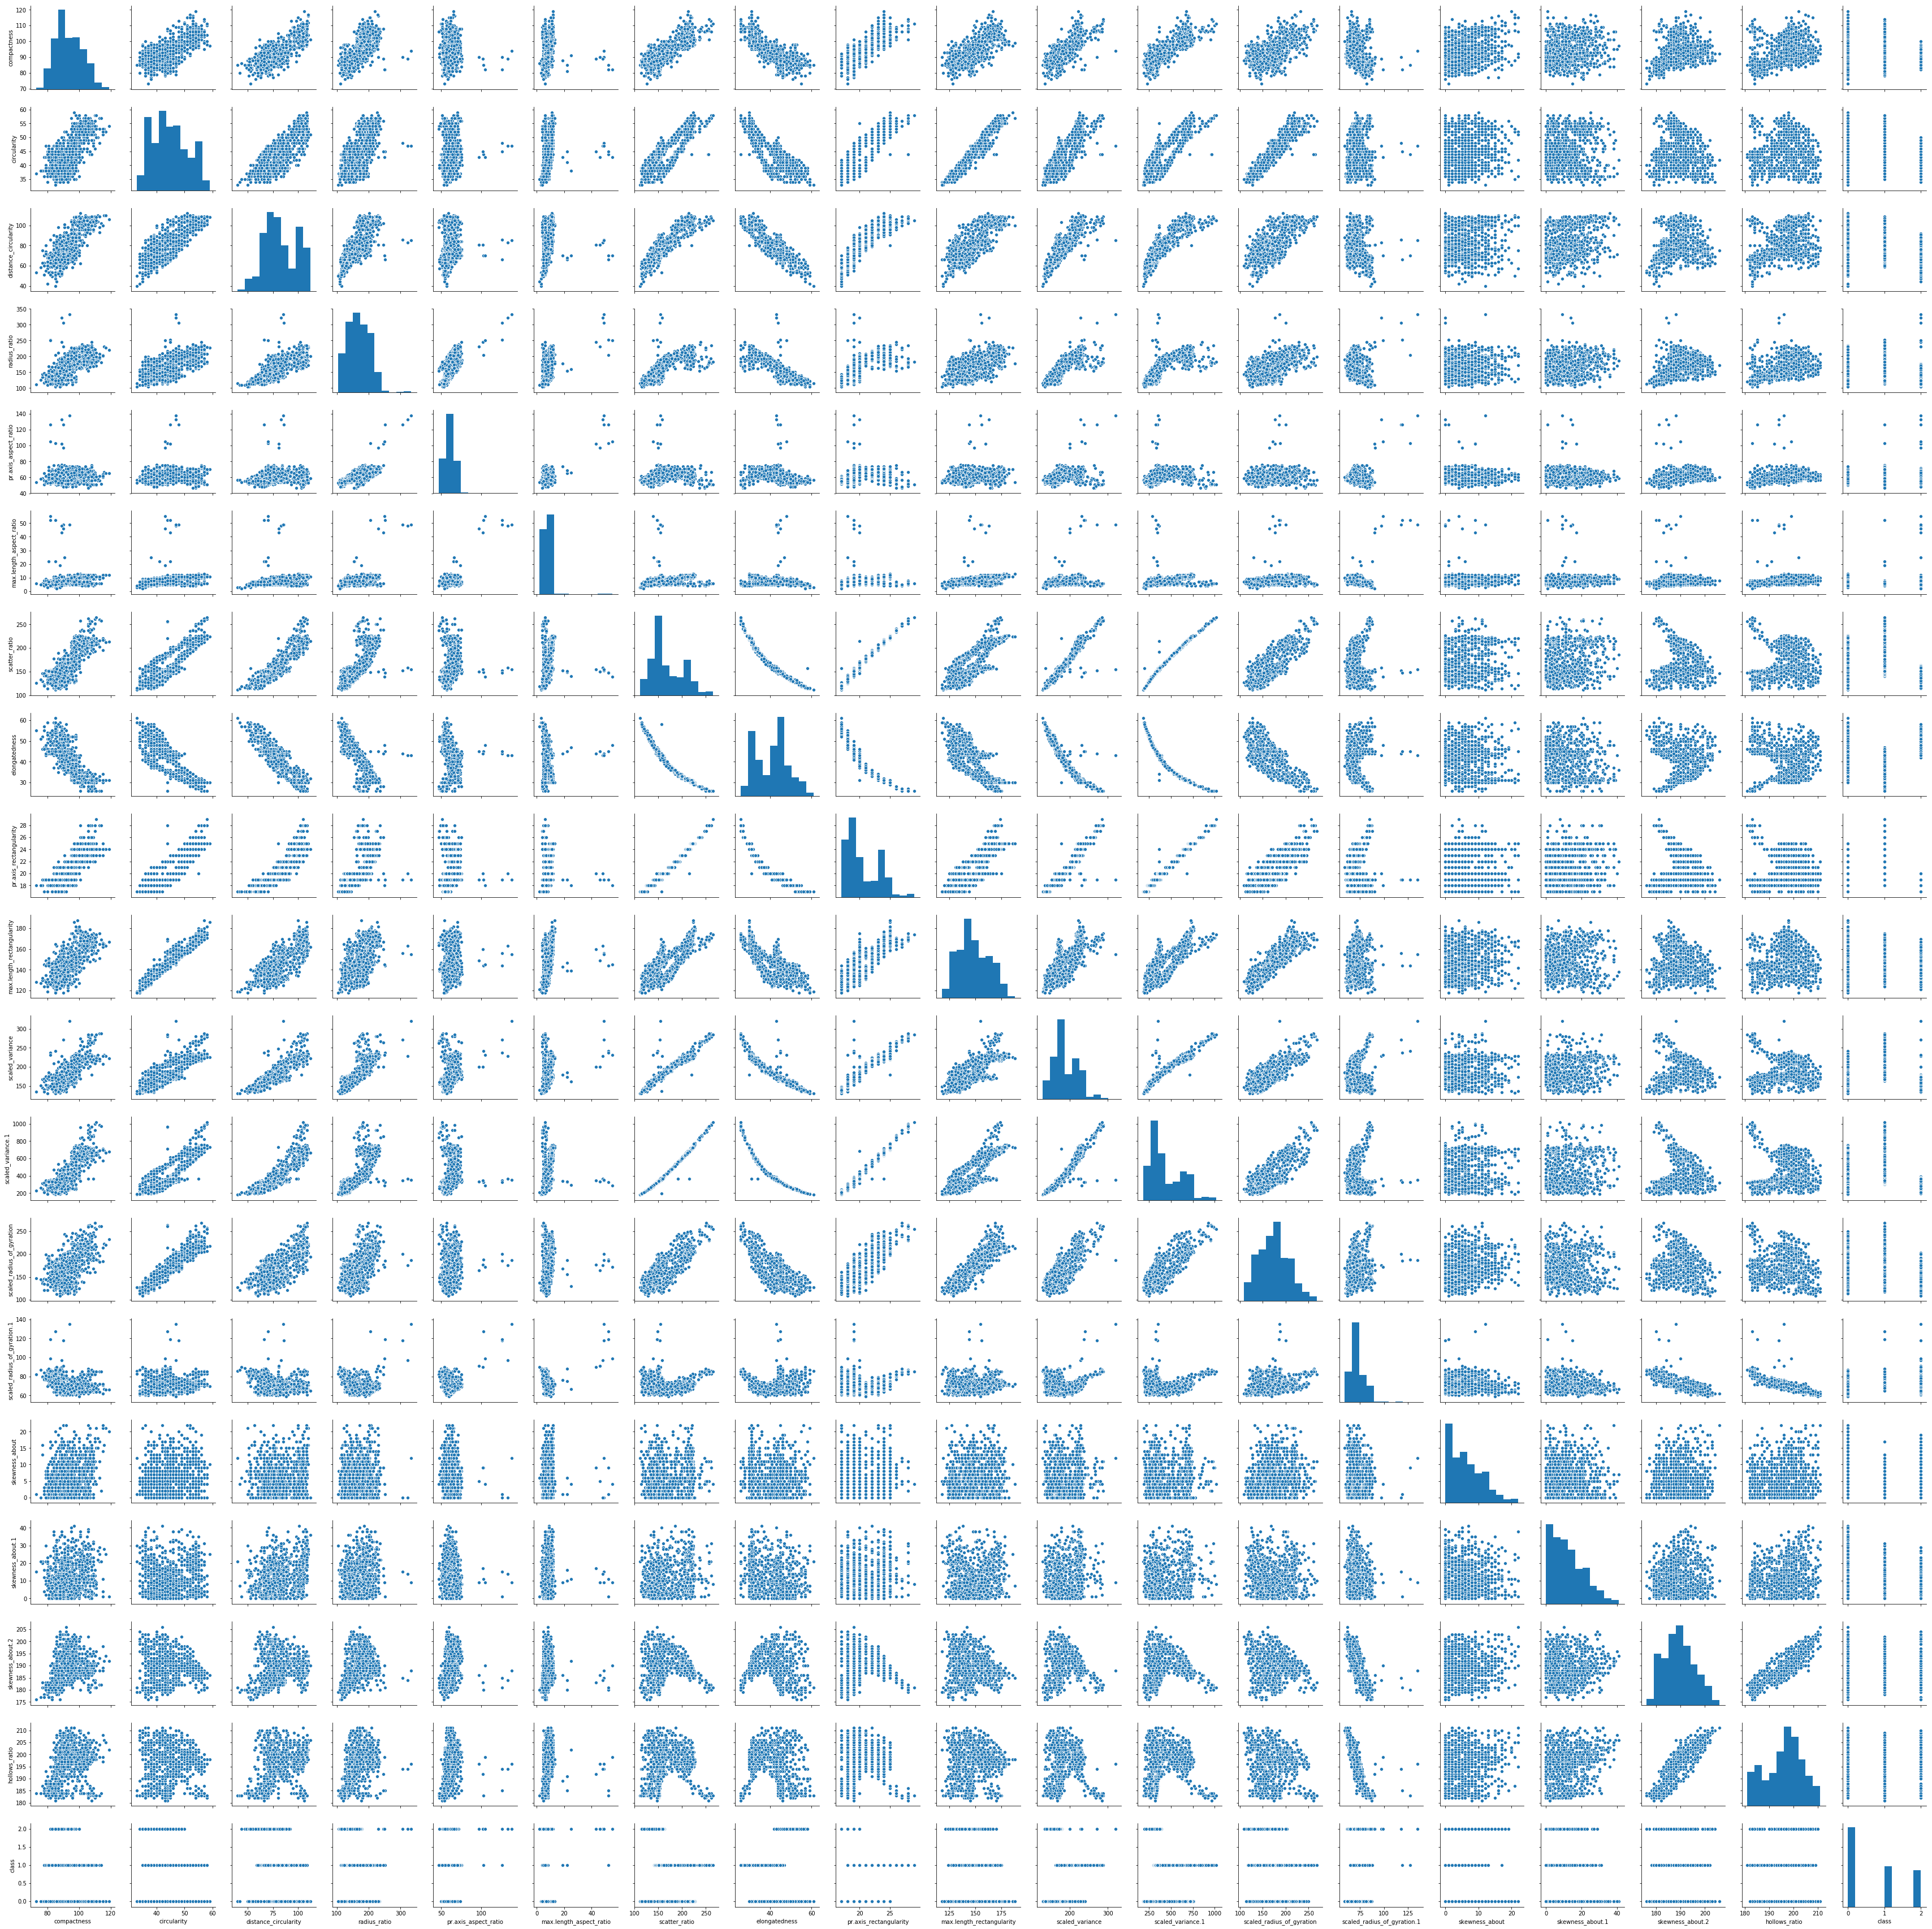

In [162]:
sns.pairplot(df)

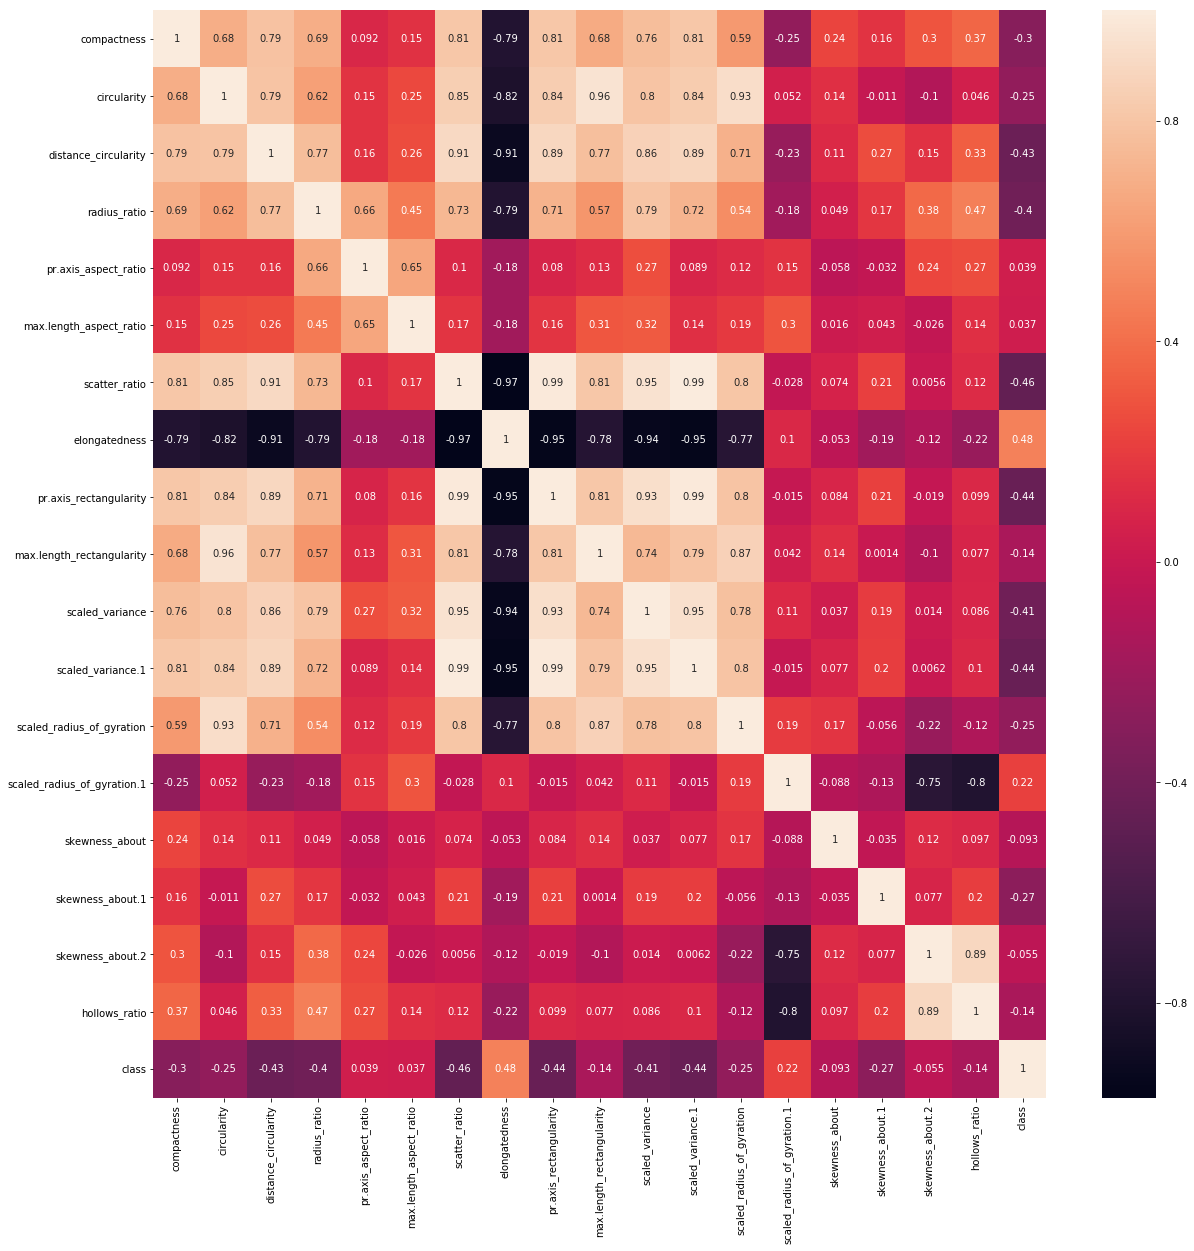

In [218]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(), annot = True,ax=ax)

In [163]:
X = df[df.columns[1:-1]]
y = df['class']

In [164]:
X.shape

(846, 17)

In [165]:
y.shape

(846,)

In [166]:
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00118343  0.79325751  0.6216467   0.15396023  0.25176438  0.8489411
  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508  0.92691166
   0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79325751  1.00118343  0.76794246  0.15864319  0.26499957  0.90614687
  -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577  0.70660663
  -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.6216467   0.76794246  1.00118343  0.66423242  0.45058426  0.73529816
  -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618  0.53700678
  -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.15396023  0.15864319  0.66423242  1.00118343  0.64949139  0.10385472
  -0.18325156  0.07969786  0.1270594   0.27323306  0.08929427  0.12211524
   0.15313091 -0.05843967 -0.0320139   0.24016968  0.26804208]
 [ 0.25176438  0.26499957  0.45058426  0.64949139  1.00118343  0.16638787
  -0.18035326  0.16169312  0.30630475  0.31933428  0.1434227 

F:\Softwares\Python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\Softwares\Python\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [167]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.30716806 -0.11059145  0.03347052  0.19910028 -0.07062272  0.28056164
   0.30144953 -0.08375275 -0.10989802 -0.00641071  0.00878969 -0.07481405
   0.2604876  -0.61511447  0.40193948 -0.21315772  0.0079465 ]
 [ 0.31526104  0.08957193  0.07532171 -0.05984492  0.05004981  0.12363379
  -0.19301419  0.41981113  0.22768822 -0.68712863 -0.0061816   0.02578491
  -0.08169396 -0.15417179 -0.16889724 -0.01717938 -0.26094331]
 [ 0.27692133  0.21290718 -0.2564833  -0.03906584 -0.04418936 -0.26634382
   0.13166639  0.23921331 -0.03533068  0.12589364  0.04857469  0.04221712
  -0.51443234  0.18218657  0.54127019 -0.16960447 -0.14971167]
 [ 0.08769365  0.14562561 -0.63587934  0.02425269 -0.04431171 -0.25647928
   0.42850854  0.20487586 -0.15038894 -0.0441116  -0.03565405 -0.01649815
   0.29286919 -0.07174107 -0.37755164  0.11319243  0.02122408]
 [ 0.1053014   0.0085409  -0.59489136  0.01512196  0.20673007  0.45539876
  -0.50745454 -0.04591446  0.14495739  0.26351264  0.01009559  0

In [168]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(8.717906178074498, array([ 0.30716806,  0.31526104,  0.27692133,  0.08769365,  0.1053014 ,
        0.32916124, -0.32633382,  0.32565836,  0.2957178 ,  0.32239989,
        0.32541872,  0.28711183, -0.01179208,  0.03788366,  0.05946042,
        0.0209435 ,  0.06804691])), (2.9661343112859435, array([-0.11059145,  0.08957193,  0.21290718,  0.14562561,  0.0085409 ,
       -0.03409268, -0.02959288, -0.0470214 , -0.10228965, -0.04502484,
       -0.04076153, -0.19545358, -0.48765549,  0.04836948,  0.12967485,
        0.54518867,  0.54985485])), (1.8762468899110367, array([ 0.03347052,  0.07532171, -0.2564833 , -0.63587934, -0.59489136,
        0.11078503, -0.07528861,  0.12121913,  0.02436481, -0.04566162,
        0.12087822,  0.03669583, -0.31284553,  0.10605637,  0.09202551,
        0.01220674, -0.01318744])), (1.1733077227152702, array([ 0.19910028, -0.05984492, -0.03906584,  0.02425269,  0.01512196,
       -0.08742121,  0.07069244, -0.08516803,  0.1980575 , -0.11701852,
       -0.084153

In [169]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

In [170]:
cum_var_exp

array([0.51221184, 0.68648409, 0.7967211 , 0.86565762, 0.91932629,
       0.9506431 , 0.9693683 , 0.98029614, 0.98626296, 0.99018807,
       0.99292838, 0.99529805, 0.99693557, 0.99814569, 0.99923537,
       0.99982476, 1.        ])

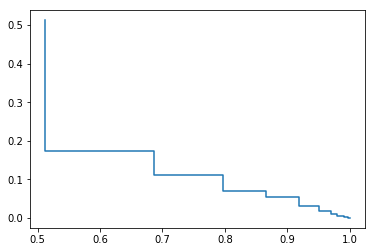

In [171]:
plt.step(cum_var_exp,y=var_explained)

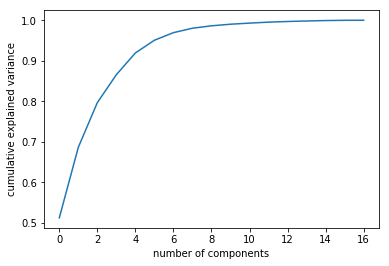

In [172]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [173]:
pca = PCA(2) 
projected = pca.fit_transform(df)
print(df.shape)
print(projected.shape)

(846, 19)
(846, 2)


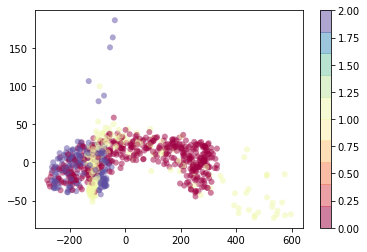

In [174]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=df['class'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar();

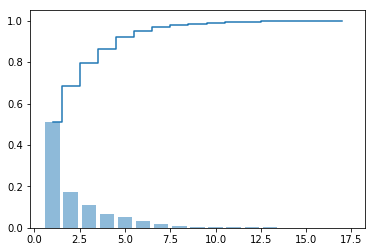

In [175]:
plt.bar(range(1,18), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,18),cum_var_exp, where= 'mid', label='cumulative explained variance')

In [176]:
P_reduce = np.array(eigvectors_sorted[0:15])   # Reducing from 8 to 4 dimension space

X_std_7D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_7D)  # converting array to dataframe for pairplot

In [177]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, y, test_size=test_size, random_state=seed)

In [178]:
# Let us build a linear regression model on the PCA dimensions 

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

regression_model.coef_

array([-0.10939171, -0.05801898, -0.13025841,  0.13756677, -0.08408163,
        0.25032141,  0.13746945, -0.57886666, -0.4383748 , -0.90096932,
       -0.05221031, -0.83078572, -1.10926599,  0.76714256,  0.63694013])

In [179]:
regression_model.score(X_test, y_test)

0.596124476743664

In [182]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print (accuracy)

0.8307086614173228


In [183]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.01, 0.05, 0.5, 1]
    gammas = [0.001, 0.01, 0.1, 1]
    kernels=['rbf','linear']
    param_grid = {'C': Cs, 'gamma' : gammas,'kernel':kernels}
    grid_search = GridSearchCV(svm.SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [184]:
print(svc_param_selection(X_train,y_train,5))

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


F:\Softwares\Python\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [220]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'rbf', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 

F:\Softwares\Python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [221]:
accuracy

0.9763779527559056